In [93]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
import sympy as smp

# Solving ODE of a Simple Pendulum
Within this file I look at a simple pendulum system and solve it using functions from different packages. I first decale the problem using sympy to visualize the equations of motion, then using odeint from scipy.integrate i numerically solve the second order differential equation.

$ PE = mgy $ and $ KE=\frac{1}{2}m(\dot{x}^2 + \dot{y}^2) $<br>
<img src="Pendulum.png">

In [94]:
t, m, g, l = smp.symbols("t m g l")

In [95]:
x, y, theta = smp.symbols("x y \\theta", cls=smp.Function)
theta = theta(t)
theta_d = smp.diff(theta, t)
theta_dd = smp.diff(theta_d, t)
x = l*smp.cos(theta)
y = l*smp.sin(theta)#position of the mass
dx = smp.diff(x, t)
dy = smp.diff(y, t)

x_f = smp.lambdify((l, theta), x)
y_f = smp.lambdify((l, theta), y)

Now we build our PE and KE for the Lagrangian equation

In [96]:
T = (1/2)*m*(dx**2 + dy**2)
U = m*g*(l-y)
T = T.simplify()

L = T-U

In [97]:
T

0.5*l**2*m*Derivative(\theta(t), t)**2

In [98]:
U

g*m*(-l*sin(\theta(t)) + l)

In [99]:
L

-g*m*(-l*sin(\theta(t)) + l) + 0.5*l**2*m*Derivative(\theta(t), t)**2

<img src="Lagrangian.png"><br>
Here $\dot{q} = \dot{\theta}$ and $q=\theta$

In [100]:
LE = smp.diff(L, theta) - smp.diff(smp.diff(L, theta_d), t)
LE = LE.simplify()
LE

l*m*(g*cos(\theta(t)) - 1.0*l*Derivative(\theta(t), (t, 2)))

In [101]:
smp.solve(LE, theta_dd)[0]

g*cos(\theta(t))/l

Here, let $z=[\dot{\theta}, \theta] and \dot{z}=[\ddot{\theta}, \dot{\theta}]$
We are also going to say that $\dot{\theta} = \omega$, angular velocity


Text(0, 0.5, 'Position [m]')

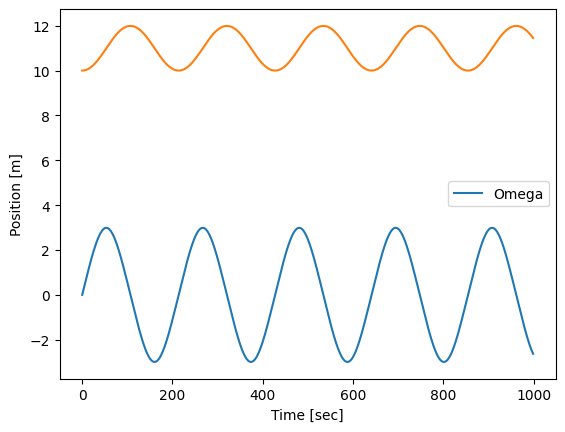

In [102]:
def dzdt(z, t, g, l):
    return np.array([
        -g*np.cos(z[1])/l,
        z[0]
    ])
z0 = np.array([0, 10])
g = 9.8
l = 1
sols = odeint(dzdt, z0, np.linspace(0, 10, 1000), args=(g, l,))
theta_vals = sols.T[1]
omega = sols.T[0]
plt.plot(sols.T[0], label="Omega")
plt.plot(sols.T[1])
plt.legend()
plt.xlabel("Time [sec]")
plt.ylabel("Position [m]")


Text(0.5, 1.0, 'Path of motion of our Pendulum')

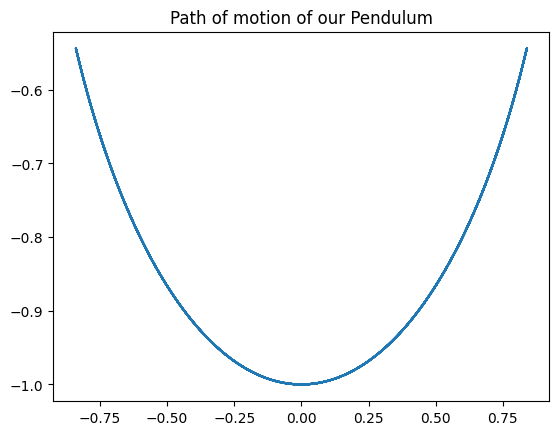

In [103]:
plt.plot(x_f(l, theta_vals), y_f(l, theta_vals))
plt.title("Path of motion of our Pendulum")

Now lets look back at the picture from the beginning. Here we have some inital conditions that we can put into the equations of motion and solve for. Recall that $z=[\dot{\theta}, \theta]$


<img src="Pendulum.png">

Text(0, 0.5, 'Position [m]')

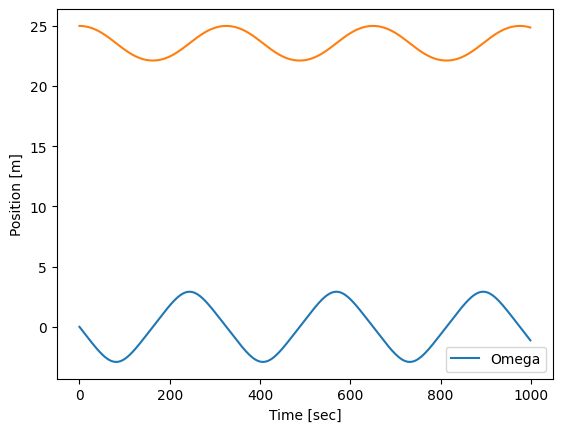

In [104]:
def dzdt(z, t, g, l):
    return np.array([
        -g*np.cos(z[1])/l,
        z[0]
    ])
#here z0 are the inital condition for z. 
z0 = np.array([0, 25])
l = 2
g = 9.8
sols = odeint(dzdt, z0, np.linspace(0, 10, 1000), args=(g, l,))
theta_vals = sols.T[1]
omega = sols.T[0]
plt.plot(sols.T[0], label="Omega")
plt.plot(sols.T[1])
plt.legend()
plt.xlabel("Time [sec]")
plt.ylabel("Position [m]")

Text(0.5, 1.0, 'Path of motion of our Pendulum')

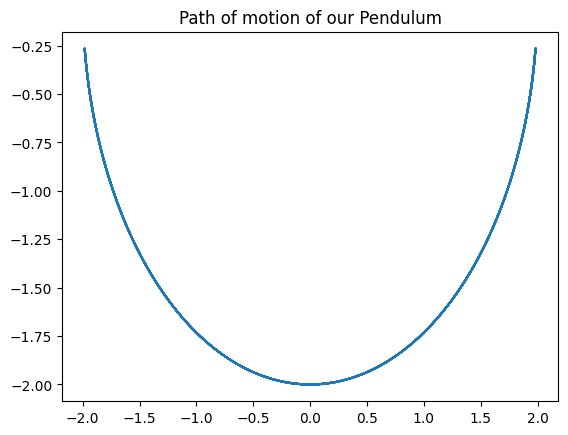

In [105]:
plt.plot(x_f(l, theta_vals), y_f(l, theta_vals))
plt.title("Path of motion of our Pendulum")

------

<img src="drawing.png">

In [128]:
t, m, g, l = smp.symbols("t m g l")
x, y, theta = smp.symbols("x y \\theta", cls=smp.Function)
theta = theta(t)
theta_d = smp.diff(theta, t)
theta_dd = smp.diff(theta_d, t)
x = x(theta)
y = y(theta)#position of the mass
x = theta
y = theta**2

dx = smp.diff(x, t)
dy = smp.diff(y, t)

x_f = smp.lambdify(theta, x)
y_f = smp.lambdify(theta, y)

In [129]:
T = (1/2)*m*(dx**2 + dy**2)
U = m*g*(l-y)
T = T.simplify()

L = T-U

In [130]:
LE = smp.diff(L, theta) - smp.diff(smp.diff(L, theta_d), t)
LE = LE.simplify()
LE

m*(2*g*\theta(t) - 2*(2.0*\theta(t)**2 + 0.5)*Derivative(\theta(t), (t, 2)) - 4.0*\theta(t)*Derivative(\theta(t), t)**2)

In [131]:
smp.solve(LE, theta_dd)[0]

2.0*(g - 2.0*Derivative(\theta(t), t)**2)*\theta(t)/(4.0*\theta(t)**2 + 1.0)

In [132]:
z = smp.solve(LE, theta_dd)[0]
z_f = smp.lambdify((g, theta, theta_d), z)

Here, let $z=[\dot{\theta}, \theta] and \dot{z}=[\ddot{\theta}, \dot{\theta}]$
We are also going to say that $\dot{\theta} = \omega$, angular velocity

Text(0, 0.5, 'Position [m]')

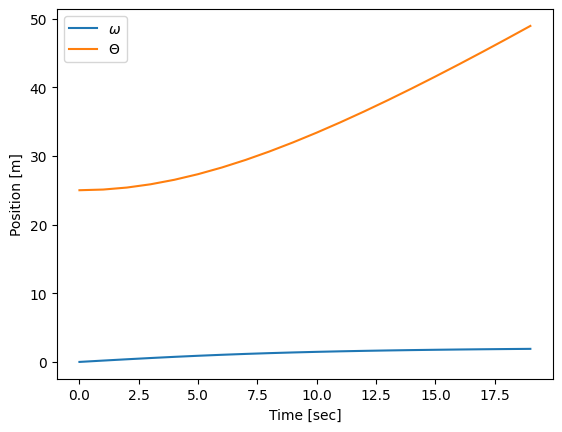

In [133]:
def dzdt(z, t, g):
    return np.array([
        z_f(g, z[1], z[0]),
        z[0]
    ])
#here z0 are the inital condition for z. 
z0 = np.array([0, 25])
g = 9.8
sols = odeint(dzdt, z0, t=np.arange(0, 20, 1), args=(g,))
theta_vals = sols.T[1]
omega = sols.T[0]
plt.plot(sols.T[0], label=r"$\omega$")
plt.plot(sols.T[1], label=r"$\Theta$")
plt.legend()
plt.xlabel("Time [sec]")
plt.ylabel("Position [m]")

In [112]:
plt.plot(x_f(l, theta_vals), y_f(l, theta_vals))
plt.title("Path of motion of our Pendulum")

TypeError: _lambdifygenerated() takes 1 positional argument but 2 were given

2